## Assignment 10.2
Author: Rex Gayas
Date: 18 February 2024
Modified By: N/A
Description: Conducting a real-world financial analysis using Pandas to compute key investment metrics and compare the volatility of major stocks and indices.

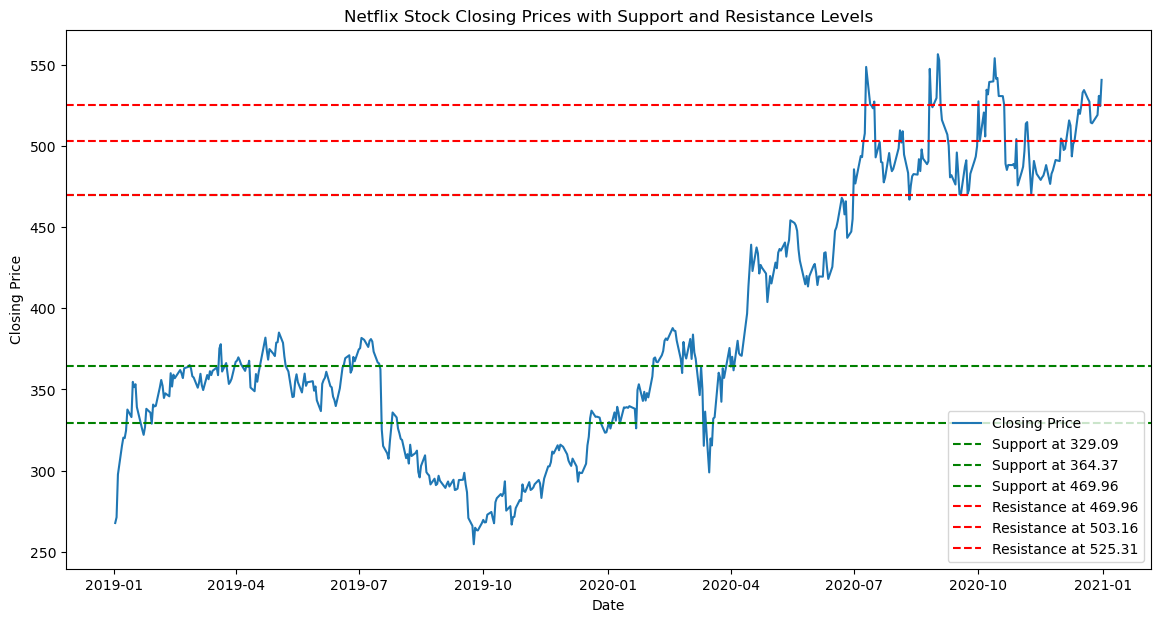

In [24]:
# Solution to Exercise 1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Class for analyzing stock data
class StockAnalyzer:
    def __init__(self, data):
        self.data = data
    
    # Method to calculate support and resistance levels
    def calculate_levels(self):
        closing_prices = self.data['close']
        return {
            'support': closing_prices.quantile([0.25, 0.5, 0.75]).tolist(),
            'resistance': closing_prices.quantile([0.75, 0.9, 0.95]).tolist()
        }

# Class for visualizing stock data
class StockVisualizer:
    def __init__(self, data):
        self.data = data
    
    # Method to plot the data with support and resistance lines
    def plot_levels(self, levels):
        plt.figure(figsize=(14, 7))
        plt.plot(self.data['close'], label='Closing Price')
        for level in levels['support']:
            plt.axhline(y=level, color='green', linestyle='--', label=f'Support at {level:.2f}')
        for level in levels['resistance']:
            plt.axhline(y=level, color='red', linestyle='--', label=f'Resistance at {level:.2f}')
        plt.title('Netflix Stock Closing Prices with Support and Resistance Levels')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.show()

# Load the stock data for Netflix
netflix_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\netflix.csv', parse_dates=['date'], index_col='date')

# Analyze the stock data
analyzer = StockAnalyzer(netflix_data)
levels = analyzer.calculate_levels()

# Visualize the stock data with calculated levels
visualizer = StockVisualizer(netflix_data)
visualizer.plot_levels(levels)



array([<Axes: title={'center': "After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <Axes: title={'center': 'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

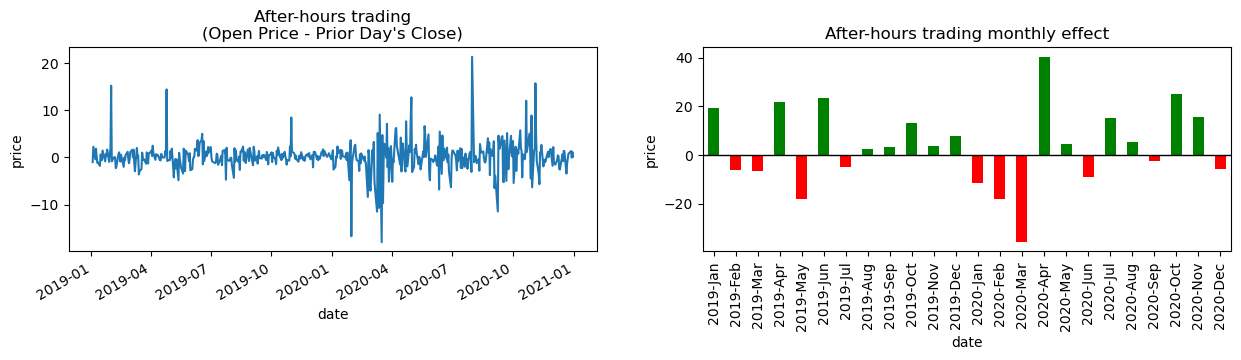

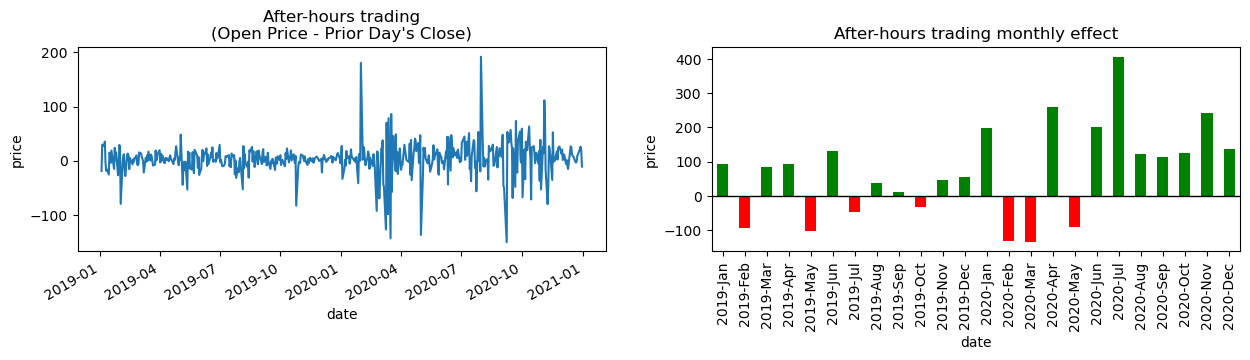

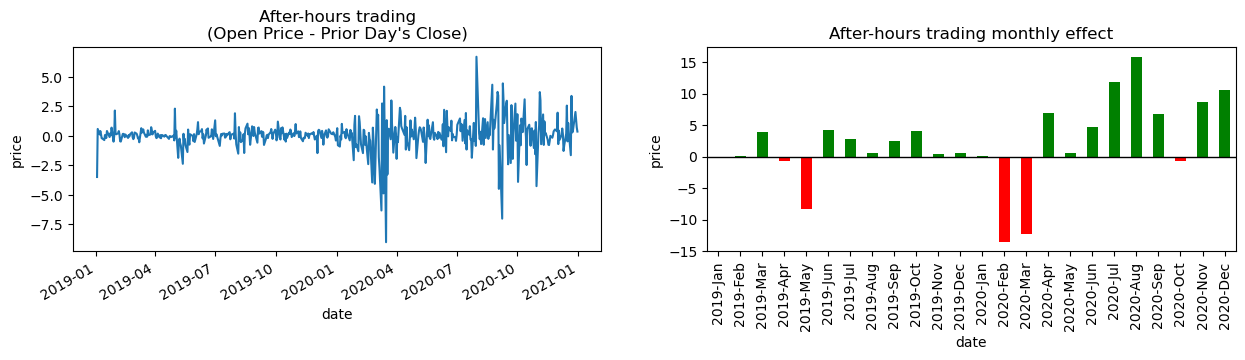

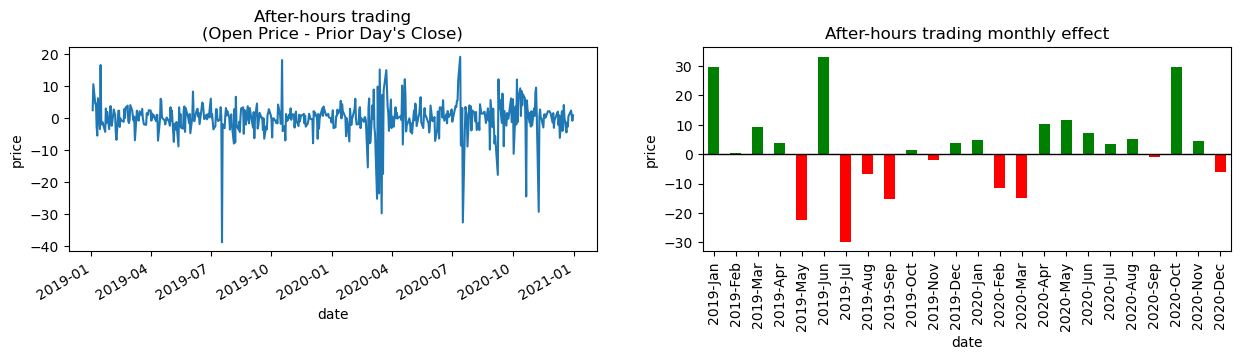

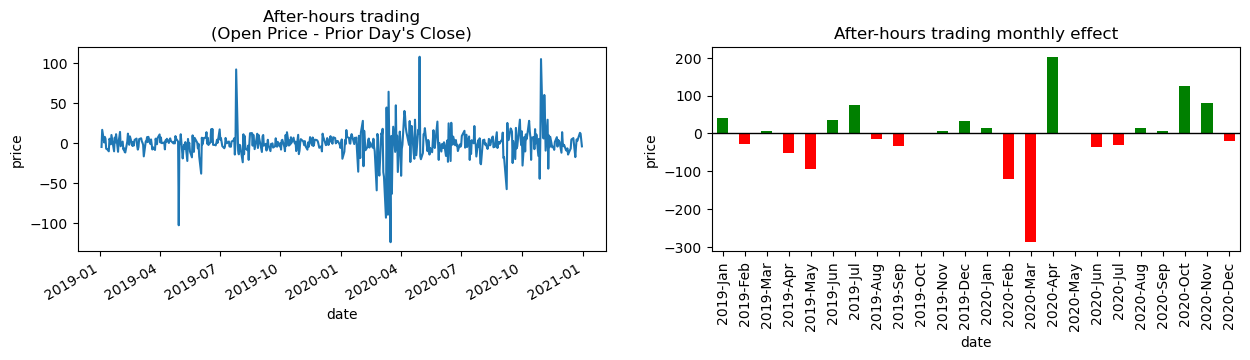

In [25]:
# Solution to Exercise 2
import pandas as pd
from stock_analysis import StockVisualizer

# Load the data for each FAANG stock
facebook_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\facebook.csv', parse_dates=['date'], index_col='date')
amazon_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\amazon.csv', parse_dates=['date'], index_col='date')
apple_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\apple.csv', parse_dates=['date'], index_col='date')
netflix_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\netflix.csv', parse_dates=['date'], index_col='date')
google_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\google.csv', parse_dates=['date'], index_col='date')

# Initialize a StockVisualizer for each stock
facebook_viz = StockVisualizer(facebook_data)
amazon_viz = StockVisualizer(amazon_data)
apple_viz = StockVisualizer(apple_data)
netflix_viz = StockVisualizer(netflix_data)
google_viz = StockVisualizer(google_data)

# Visualize the after-hours trading effects for each stock
facebook_viz.after_hours_trades()
amazon_viz.after_hours_trades()
apple_viz.after_hours_trades()
netflix_viz.after_hours_trades()
google_viz.after_hours_trades()



<Axes: ylabel='price'>

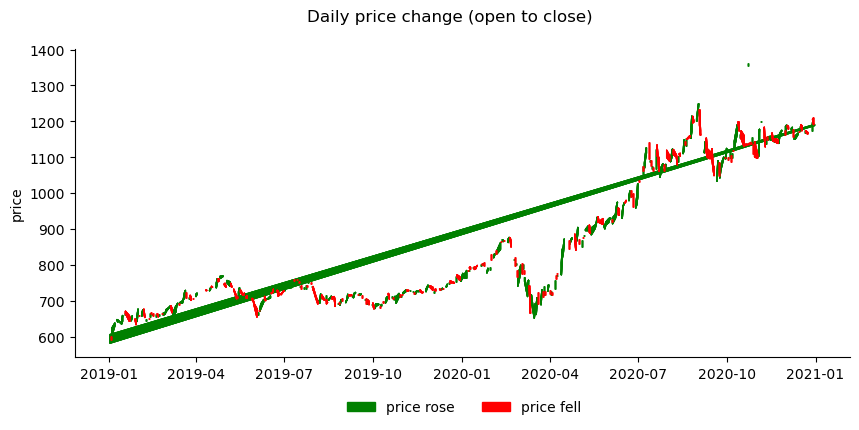

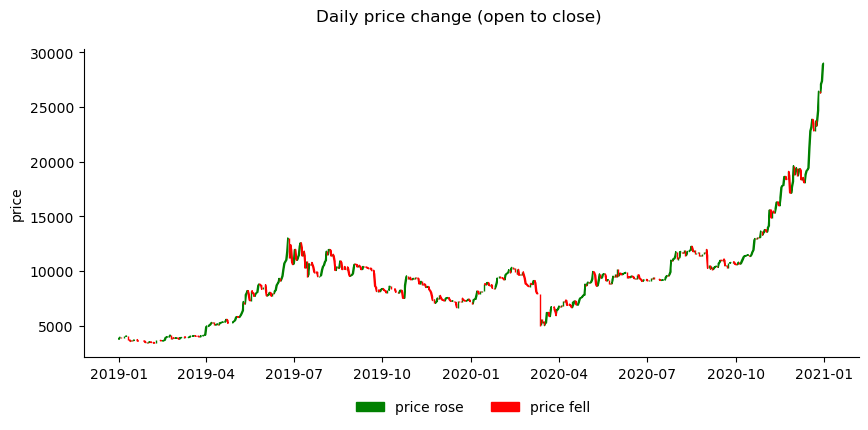

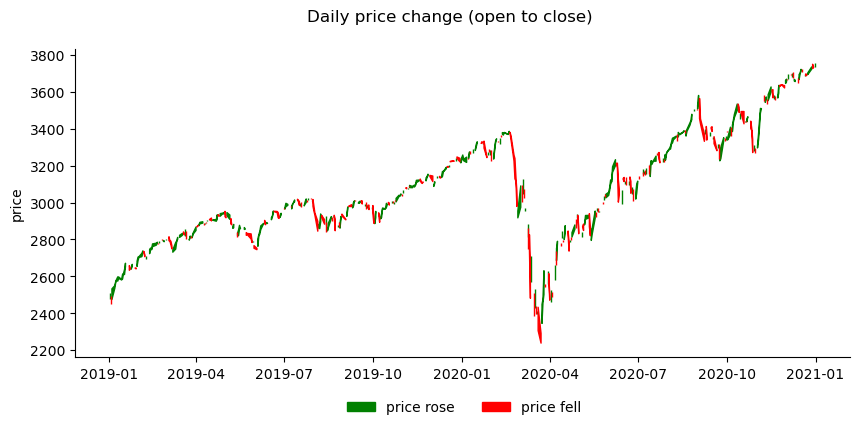

In [26]:
# Solution to Exercise 3
import pandas as pd
from stock_analysis import StockVisualizer

# Load the data for each FAANG stock, Bitcoin, and S&P 500
facebook_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\facebook.csv', parse_dates=['date'], index_col='date')
amazon_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\amazon.csv', parse_dates=['date'], index_col='date')
apple_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\apple.csv', parse_dates=['date'], index_col='date')
netflix_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\netflix.csv', parse_dates=['date'], index_col='date')
google_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\google.csv', parse_dates=['date'], index_col='date')

bitcoin_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\bitcoin.csv', parse_dates=['date'], index_col='date')
sp500_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\sp500.csv', parse_dates=['date'], index_col='date')

# Combine the FAANG stocks into one DataFrame
faang_combined = pd.concat([facebook_data, amazon_data, apple_data, netflix_data, google_data])

# Calculate the average opening and closing prices for the FAANG stocks
faang_combined['open'] = faang_combined.groupby(faang_combined.index.date)['open'].transform('mean')
faang_combined['close'] = faang_combined.groupby(faang_combined.index.date)['close'].transform('mean')

# Create the visualizer for the FAANG portfolio
faang_viz = StockVisualizer(faang_combined)

# Use the open_to_close method to create the plot for FAANG stocks
faang_viz.open_to_close()

# Create the visualizer for Bitcoin and S&P 500 separately
bitcoin_viz = StockVisualizer(bitcoin_data)
sp500_viz = StockVisualizer(sp500_data)

# Use the open_to_close method to create the plot for Bitcoin
bitcoin_viz.open_to_close()

# Use the open_to_close method to create the plot for S&P 500
sp500_viz.open_to_close()


In [27]:
# Solution to Exercise 4
import pandas as pd
import numpy as np

# Relevant File Paths Loaded
facebook_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\facebook.csv', parse_dates=['date'], index_col='date')
amazon_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\amazon.csv', parse_dates=['date'], index_col='date')
apple_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\apple.csv', parse_dates=['date'], index_col='date')
netflix_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\netflix.csv', parse_dates=['date'], index_col='date')
google_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\google.csv', parse_dates=['date'], index_col='date')
bitcoin_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\bitcoin.csv', parse_dates=['date'], index_col='date')
sp500_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Week 10\sp500.csv', parse_dates=['date'], index_col='date')

class StockAnalyzer:
    """
    Class to perform analysis on stock data.
    """
    def __init__(self, stock_data):
        self.stock_data = stock_data

    def annualized_volatility(self):
        """
        Calculate and return the annualized volatility of the stock data.
        """
        daily_returns = self.stock_data['close'].pct_change().dropna()
        annualized_volatility = daily_returns.std() * np.sqrt(252)  # Assuming 252 trading days in a year
        return annualized_volatility

class AssetGroupAnalyzer:
    """
    Class to analyze a group of assets.
    """
    def __init__(self, assets):
        self.assets = assets

    def compare_volatility(self):
        """
        Compare the annualized volatility of the assets and return a summary.
        """
        volatilities = {
            asset_name: StockAnalyzer(asset_data).annualized_volatility()
            for asset_name, asset_data in self.assets.items()
        }
        return volatilities

# Create a dictionary to hold the assets for comparison
assets = {
    'S&P 500': sp500_data,
    'Amazon': amazon_data,
    'Apple': apple_data,
    'Facebook': facebook_data
}

# Create an AssetGroupAnalyzer instance with the assets
group_analyzer = AssetGroupAnalyzer(assets)

# Compare the annualized volatility
volatility_comparison = group_analyzer.compare_volatility()
print(volatility_comparison)


{'S&P 500': 0.25914725047520776, 'Amazon': 0.3168608138773414, 'Apple': 0.3785121674703002, 'Facebook': 0.37869858984263643}


In [23]:
# Solution to Exercise 5?
import pandas as pd

# Simulated StockAnalyzer class for financial metrics (assuming the placeholders are here?)
class StockAnalyzer:
    def __init__(self, stock_data):
        self.stock_data = stock_data

    def alpha(self, index, r_f):
        return 0.0

    def beta(self, index):
        return 0.0

    def sharpe_ratio(self, r_f):
        return 0.0

    def annualized_volatility(self):
        return 0.0

    def is_bear_market(self):
        return False

    def is_bull_market(self):
        return False

# Function to create a DataFrame from the analysis
def analyze_stock(stock_analyzer, index=None, r_f=0.0):
    # Define the methods to calculate
    methods = [
        'alpha', 'beta', 'sharpe_ratio',
        'annualized_volatility', 'is_bear_market', 'is_bull_market'
    ]
    
    # Use dictionary comprehension and getattr to call each method dynamically
    analysis_results = {
        method: getattr(stock_analyzer, method)(index, r_f) if 'index' in method or 'sharpe' in method else getattr(stock_analyzer, method)()
        for method in methods
    }
    
    # Convert to a DataFrame
    return pd.DataFrame([analysis_results])